<span style="color: blue; font-size: 18pt">
1. 라이브러리 임포트하기 
</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<span style="color: blue; font-size: 18pt">
2. 데이터셋 로드하기
</span>

In [2]:
df_train=pd.read_csv("C:/Users/user/Downloads/final/2_Original Dataset(2).csv") # 훈련용
df_test=pd.read_csv("C:/Users/user/Downloads/final/2_Original Dataset(3).csv") # 예측용

<span style="color: blue; font-size: 18pt">
3. 데이터 분석 및 시각화 
</span>

<span style="color: magenta; font-size: 11pt">
데이터셋 컬럼의 정보들을 다음과 같습니다.


- ID -User id

- Segment type : Medium of Usage

- Segment Description: Name of Universities

- Answer: Do you use tinder?

- Count: Number of Matches

- Percentage: % of matches

- It became a relationship- Success of relationship (Target)
    
</span>

훈련 데이터셋을 이용해 분석하고, 이후 테스트 데이터셋도 동일한 절차로 가공하겠습니다.

In [3]:
df_train

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0
1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0
2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0
4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0
...,...,...,...,...,...,...,...
1891,292887.5496,web,"Meridian, Idaho",No,0.000000,0.000000,0
1892,292881.6932,mobile,"Meridian, Idaho",No,1203.190399,0.312360,0
1893,292900.8499,gender,"Meridian, Idaho",No,806.378820,0.488025,0
1894,292893.8600,gender,"Meridian, Idaho",No,1149.529381,0.488984,0


In [4]:
# 처음 5줄 확인
df_train.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0
1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0
2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0
4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0


In [5]:
df_train.tail()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
1891,292887.5496,web,"Meridian, Idaho",No,0.000000,0.000000,0
1892,292881.6932,mobile,"Meridian, Idaho",No,1203.190399,0.312360,0
1893,292900.8499,gender,"Meridian, Idaho",No,806.378820,0.488025,0
1894,292893.8600,gender,"Meridian, Idaho",No,1149.529381,0.488984,0
1895,292890.2944,web,"Meridian, Idaho",No,0.000000,0.000000,0


In [6]:
# 데이터셋의 전반적인 정보 확인
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1896 non-null   float64
 1   Segment type              1896 non-null   object 
 2   Segment Description       1896 non-null   object 
 3   Answer                    1896 non-null   object 
 4   Count                     1896 non-null   float64
 5   Percentage                1896 non-null   float64
 6   It became a relationship  1896 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 103.8+ KB


결측치 없음을 확인 가능합니다.

In [7]:
df_train.describe()

,ID,Count,Percentage,It became a relationship
count,1896.000000,1896.000000,1896.000000,1896.000000
mean,292999.394750,446.881267,0.254098,0.350738
std,227.809806,494.110578,0.220809,0.477327
min,292881.000000,0.000000,0.000000,0.000000
25%,292888.196925,0.000000,0.000000,0.000000
50%,292893.904400,400.439633,0.257873,0.000000
75%,292902.568750,845.560798,0.396787,1.000000
max,293785.000000,1969.000000,1.000000,1.000000


In [8]:
# 범주형 열 목록
category = ['Segment type', 'Segment Description', 'Answer', 'It became a relationship']

# 각 열에 대해 unique value 개수와 목록을 출력
for col in category:
    unique_values = df_train[col].unique()  
    unique_count = len(unique_values)  
    print(f'Unique values in "{col}" column count: {unique_count}')
    print(unique_values)
    print('-'*50)

Unique values in "Segment type" column count: 4
['web' 'gender' 'university' 'mobile']
--------------------------------------------------
Unique values in "Segment Description" column count: 148
['Meridian, Idaho' 'University of Iowa' 'University of Wisconsin-Madison'
 'University of California, Davis' 'University of California, San Diego'
 'Cal Poly San Luis Obispo' 'Wesleyan University' 'University of Delaware'
 'Ohio University' 'University of California, Santa Cruz'
 'University of Colorado Boulder' 'Rochester Institute of Technology'
 'Morehead State University' 'University of Georgia'
 'Southern Methodist University' 'University of Miami'
 'University of Arizona' 'Sacred Heart University'
 'Northern Illinois University' 'Yale University'
 'University of Washington' 'University of Central Florida'
 'Ithaca College' 'University of North Carolina'
 'Loyola University Maryland' 'Westport, CT' 'University of Pittsburgh'
 'Johns Hopkins University' 'Indiana University' 'Vanderbilt Univ

딥러닝에서 y label로 사용될 'It became a relationship'컬럼을 분석

In [9]:
df_train['It became a relationship']

0       0
1       0
2       0
3       0
4       0
       ..
1891    0
1892    0
1893    0
1894    0
1895    0
Name: It became a relationship, Length: 1896, dtype: int64

여기서 1은 yes, 0은 no를 의미합니다.

In [10]:
# 0 /1 답변의 비율 확인
df_train.groupby("It became a relationship").size() / len(df_train)

It became a relationship
0    0.649262
1    0.350738
dtype: float64

In [11]:
# 정수형으로 형변환
df_train["It became a relationship"] = df_train["It became a relationship"].astype(int)

<AxesSubplot:xlabel='It became a relationship'>

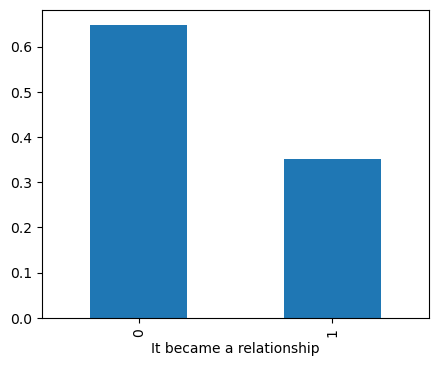

In [12]:
# bar plot으로 시각화 
df_train['It became a relationship'].value_counts(normalize = True).plot.bar(figsize = (5, 4))

No와 Yes의 비율이 약 65:35임을 확인 가능합니다.

Segment type 컬럼을 분석해보겠습니다.

In [13]:
# 'Segement type' 열의 unique value
df_train.groupby('Segment type').size()

Segment type
gender        488
mobile        483
university    464
web           461
dtype: int64

<AxesSubplot:xlabel='Segment type'>

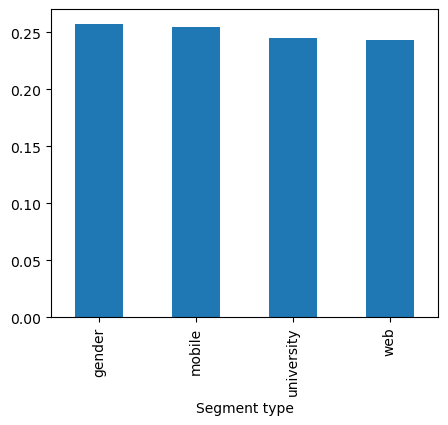

In [14]:
# bar plot으로 시각화 
df_train['Segment type'].value_counts(normalize = True).plot.bar(figsize = (5, 4))

비교적 고르게 분포한 것을 알 수 있습니다. 

In [15]:
# 'Segement Description' 열의 unique value 오름차순 정렬
df_train.groupby('Segment Description').size().sort_values(ascending=True)

Segment Description
San Diego State University          1
Randolph-Macon College              1
Sacred Heart University             1
Southern Methodist University       1
Harvard University                  1
                                 ... 
University of Washington           10
University of Mississippi          10
University of Pennsylvania         12
Westport, CT                       14
Meridian, Idaho                  1421
Length: 148, dtype: int64

<span style="color: blue; font-size: 11pt">
Merdian, Idaho가 압도적으로 많은 반면 나머지 대학은 대부분 10개 이하의 답변이 나온 것을 알 수 있습니다. 
</span>

    -> Merdian, Idaho를 제외한 대학이 변수로 작용해 시사하는 유의미한 바가 없을 것으로 판단되어, segment description value의 카테고리를 엔지니어링 해줍니다.

In [16]:
# 'Meridian, Idaho'을 제외하고 나머지 고유값들을 리스트로 저장
list = df_train[df_train['Segment Description'] != 'Meridian, Idaho']['Segment Description'].unique()

In [17]:
print(list)

['University of Iowa' 'University of Wisconsin-Madison'
 'University of California, Davis' 'University of California, San Diego'
 'Cal Poly San Luis Obispo' 'Wesleyan University' 'University of Delaware'
 'Ohio University' 'University of California, Santa Cruz'
 'University of Colorado Boulder' 'Rochester Institute of Technology'
 'Morehead State University' 'University of Georgia'
 'Southern Methodist University' 'University of Miami'
 'University of Arizona' 'Sacred Heart University'
 'Northern Illinois University' 'Yale University'
 'University of Washington' 'University of Central Florida'
 'Ithaca College' 'University of North Carolina'
 'Loyola University Maryland' 'Westport, CT' 'University of Pittsburgh'
 'Johns Hopkins University' 'Indiana University' 'Vanderbilt University'
 'Miami University (Ohio)' 'Massachusetts Institute of Technology'
 'Michigan Technological University' 'Colby College' 'University of Tampa'
 'Chapman University' 'Washington University in St. Louis'
 'Bo

In [18]:
# Merdian, Idaho를 제외한 value를 리스트로 만들어 코드를 간소화
# df_train에 바로 변경사항 저장
df_train['Segment Description'].replace(list, 'SegDiscrip_Others', inplace=True)

In [19]:
df_train['Segment Description']

0       Meridian, Idaho
1       Meridian, Idaho
2       Meridian, Idaho
3       Meridian, Idaho
4       Meridian, Idaho
             ...       
1891    Meridian, Idaho
1892    Meridian, Idaho
1893    Meridian, Idaho
1894    Meridian, Idaho
1895    Meridian, Idaho
Name: Segment Description, Length: 1896, dtype: object

<AxesSubplot:xlabel='Segment Description'>

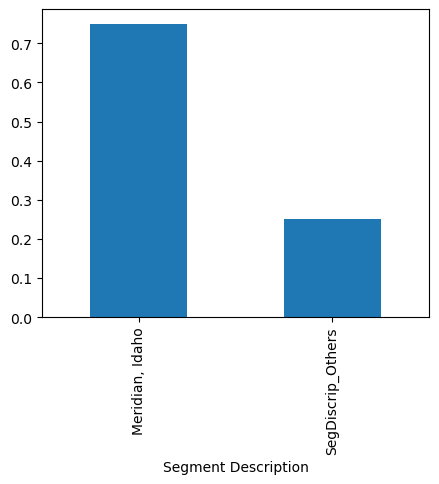

In [20]:
# bar plot으로 시각화 
df_train['Segment Description'].value_counts(normalize = True).plot.bar(figsize = (5, 4))

여전히 70%가 넘는 답변이 Meridian, Idaho인 것을 확인 가능합니다.

Answer 컬럼을 분석해보겠습니다.

In [21]:
df_train['Answer'].value_counts()

Answer
No                    1571
Yes                    164
I don't use Tinder     161
Name: count, dtype: int64

<span style="color: blue; font-size: 11pt">
'Answer' column에서 No와 I don't use tinder는 같은 대답으로 처리해줍니다.
</span>

In [22]:
# 값의 종류가 2가지로 줄어듦
# 변경사항 df_train에 저장
df_train['Answer'].replace("I don't use Tinder", "No", inplace = True)

<AxesSubplot:xlabel='Answer'>

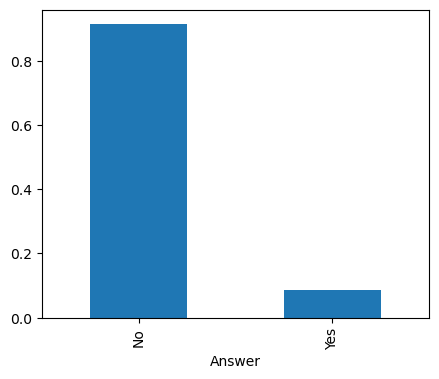

In [23]:
# bar plot으로 시각화 
df_train['Answer'].value_counts(normalize = True).plot.bar(figsize = (5, 4))

No(틴더를 사용하지 않음)의 비율이 Yes에 비해 압도적으로 많아 데이터셋의 불균형이 우려됨

<span style="color: blue; font-size: 11pt">
'No'는 0, 'Yes'는 1인 정수형으로 변환해줍니다.
</span>

In [24]:
df_train['Answer'].replace('Yes', 1, inplace=True)
df_train['Answer'].replace('No', 0, inplace=True)

In [25]:
df_train['Answer'] = df_train['Answer'].astype(int)

<AxesSubplot:xlabel='Answer'>

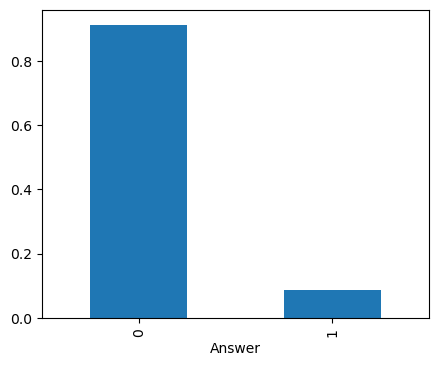

In [26]:
# bar plot으로 시각화 
df_train['Answer'].value_counts(normalize = True).plot.bar(figsize = (5,4))

Count 컬럼을 분석해 보겠습니다. 

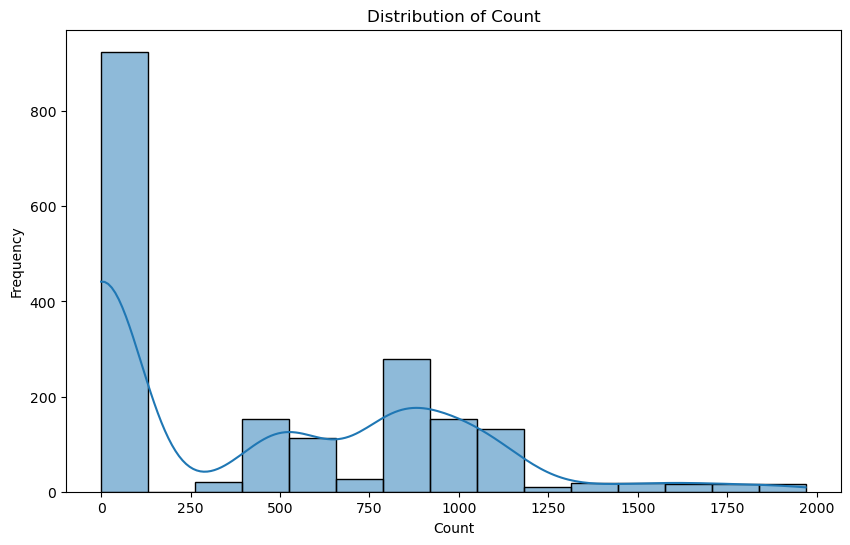

In [27]:
# Count 컬럼의 분포 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Count'], kde=True)
plt.title('Distribution of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

0의 빈도가 높은 것을 알 수 있습니다. 틴더 내 매칭 횟수를 의미하기 때문에 틴더 유저가 10% 정도인 데이터셋의 특성 상 0의 빈도가 높은 것으로 추정됩니다. 틴더를 이용하더라도 한 번도 매칭되지 않은 유저가 존재합니다.

Text(0.5, 1.0, 'Boxplot of match counts')

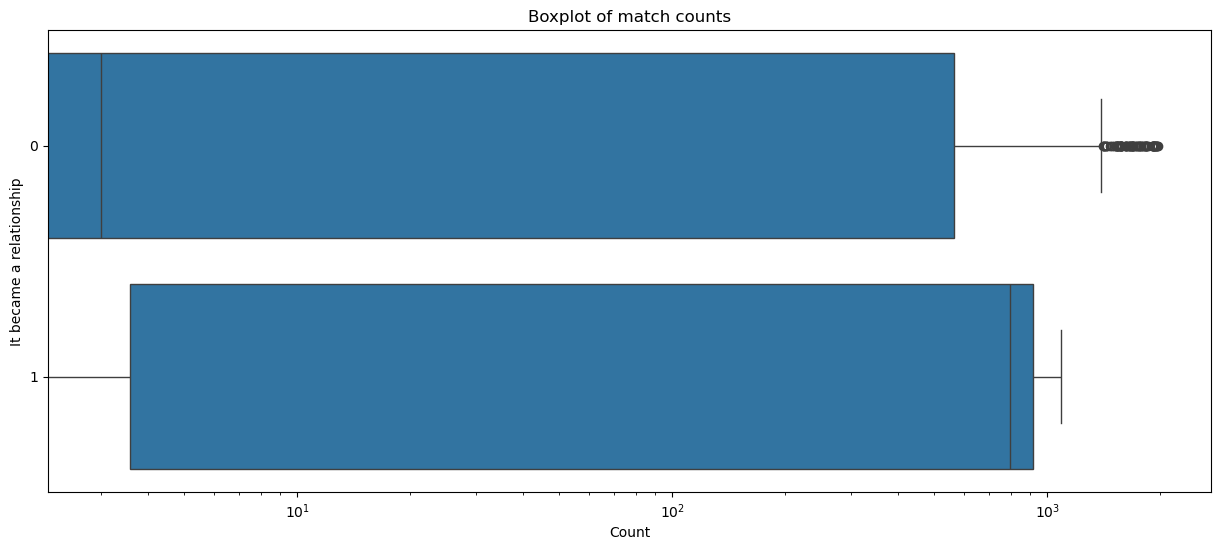

In [28]:
# Count 컬럼과 y값(It became a relationship)의 관계를 비교한 box plot
# scale 조정을 위해 log 처리 시행
plt.figure(figsize=(15,6))
sns.boxplot(x=df_train['Count'], y=df_train['It became a relationship'].astype('category'))
plt.xscale('log')
plt.title('Boxplot of match counts')

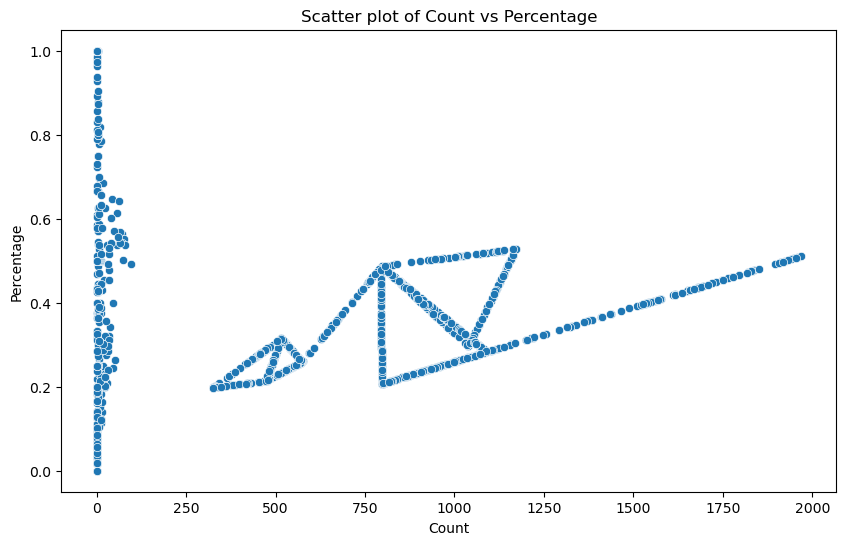

In [29]:
# Count 대비 Percentage의 scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Count', y='Percentage', data=df_train)
plt.title('Scatter plot of Count vs Percentage')
plt.xlabel('Count')
plt.ylabel('Percentage')
plt.show()

데이터가 넓게 산재해 있으며, 'Count'가 증가함에 따라 'Percentage' 값의 변화가 크지 않습니다. 

C:\Users\user\AppData\Local\Temp\ipykernel_22100\3484061956.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train['Count'], shade=True)


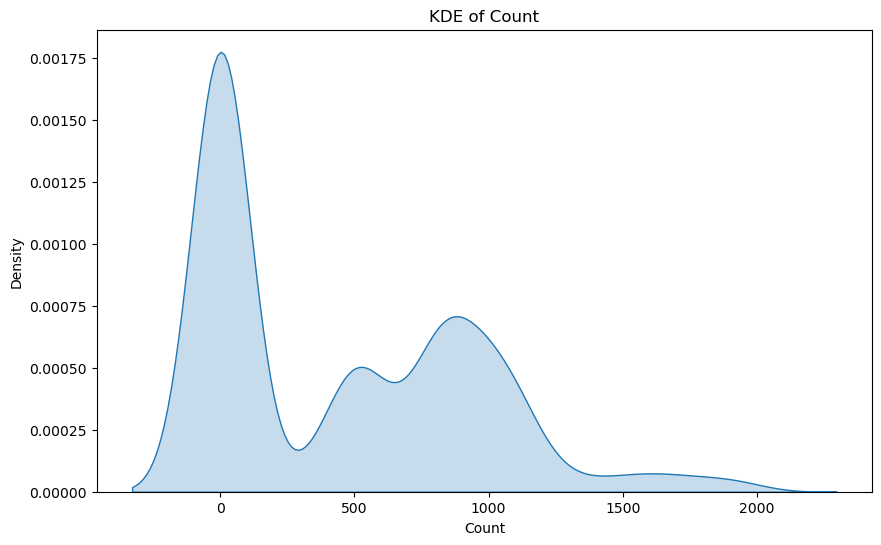

In [30]:
# Count 컬럼에 따른 KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train['Count'], shade=True)
plt.title('KDE of Count')
plt.xlabel('Count')
plt.show()

이 역시 Count 데이터가 낮은 값 주변에 집중되어 있음을 나타냅니다.

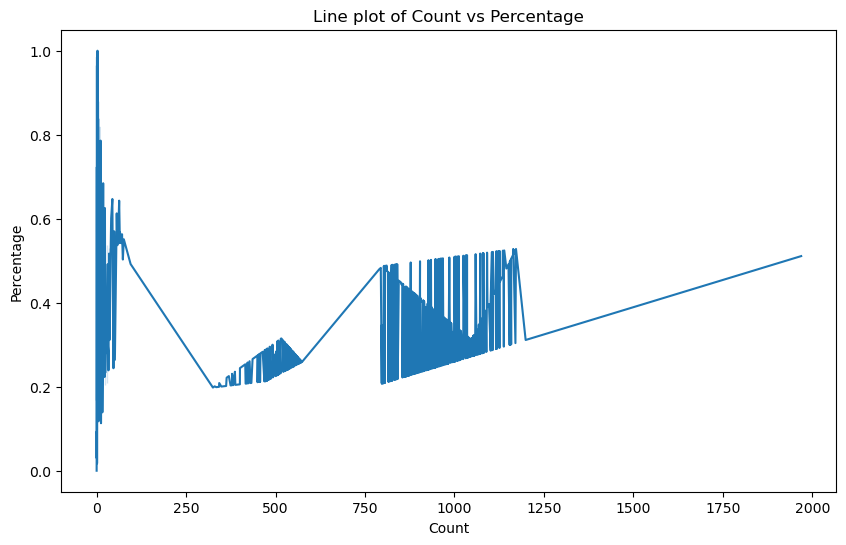

In [31]:
# Count 대 Percentage 컬럼의 관계를 보여주는 선 그래프
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_train, x='Count', y='Percentage')
plt.title('Line plot of Count vs Percentage')
plt.xlabel('Count')
plt.ylabel('Percentage')
plt.show()

데이터 포인트들 사이에 명확한 추세선이 보이지 않습니다. 이는 두 변수 간에 강한 선형 관계가 없음을 나타낼 수 있습니다.

Percentage 컬럼을 분석해보겠습니다. 

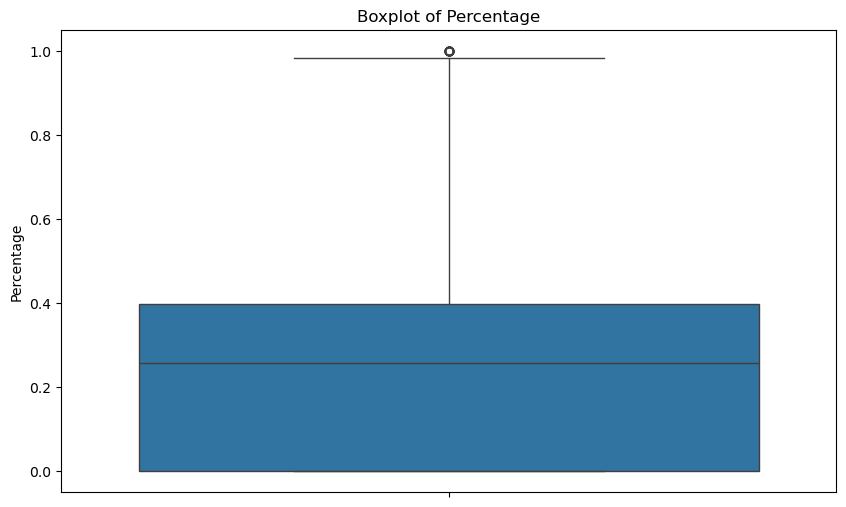

In [32]:
# Percentage 컬럼의 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_train['Percentage'])
plt.title('Boxplot of Percentage')
plt.ylabel('Percentage')
plt.show()

<span style="color:blue">
object 데이터에 대한 원-핫-인코딩을 수행해보겠습니다. 
</span>

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1896 non-null   float64
 1   Segment type              1896 non-null   object 
 2   Segment Description       1896 non-null   object 
 3   Answer                    1896 non-null   int32  
 4   Count                     1896 non-null   float64
 5   Percentage                1896 non-null   float64
 6   It became a relationship  1896 non-null   int32  
dtypes: float64(3), int32(2), object(2)
memory usage: 89.0+ KB


Segment tyoe, Segment Description 컬럼이 object임을 알 수 있습니다.

In [34]:
selected_obj = df_train.select_dtypes('object')
selected_obj

,Segment type,Segment Description
0,web,"Meridian, Idaho"
1,web,"Meridian, Idaho"
2,gender,"Meridian, Idaho"
3,web,"Meridian, Idaho"
4,gender,"Meridian, Idaho"
...,...,...
1891,web,"Meridian, Idaho"
1892,mobile,"Meridian, Idaho"
1893,gender,"Meridian, Idaho"
1894,gender,"Meridian, Idaho"


In [35]:
# 원핫 엔코딩에 필요한 모듈 임포트
from sklearn.preprocessing import OneHotEncoder

In [36]:
# 원 핫 엔코딩 수행
encoder= OneHotEncoder(handle_unknown = 'ignore') # 에러 처리 포함 
encoded_train = encoder.fit_transform(selected_obj).toarray()
train = pd.DataFrame(encoded_train, columns=encoder.get_feature_names(selected_obj.columns))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
train

,Segment type_gender,Segment type_mobile,Segment type_university,Segment type_web,"Segment Description_Meridian, Idaho",Segment Description_SegDiscrip_Others
0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
1891,0.0,0.0,0.0,1.0,1.0,0.0
1892,0.0,1.0,0.0,0.0,1.0,0.0
1893,1.0,0.0,0.0,0.0,1.0,0.0
1894,1.0,0.0,0.0,0.0,1.0,0.0


In [38]:
# 기존의 object 데이터 컬럼을 원핫 엔코딩한 컬럼으로 교체
df_train = df_train.drop(selected_obj.columns, axis=1)
df_train = pd.concat([df_train, train], axis=1)
df_train

,ID,Answer,Count,Percentage,It became a relationship,Segment type_gender,Segment type_mobile,Segment type_university,Segment type_web,"Segment Description_Meridian, Idaho",Segment Description_SegDiscrip_Others
0,292890.8970,0,0.000000,0.000000,0,0.0,0.0,0.0,1.0,1.0,0.0
1,292887.9870,0,0.000000,0.000000,0,0.0,0.0,0.0,1.0,1.0,0.0
2,292894.0656,0,499.173606,0.225255,0,1.0,0.0,0.0,0.0,1.0,0.0
3,292887.1180,0,0.000000,0.000000,0,0.0,0.0,0.0,1.0,1.0,0.0
4,292893.6561,0,455.925963,0.211360,0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1891,292887.5496,0,0.000000,0.000000,0,0.0,0.0,0.0,1.0,1.0,0.0
1892,292881.6932,0,1203.190399,0.312360,0,0.0,1.0,0.0,0.0,1.0,0.0
1893,292900.8499,0,806.378820,0.488025,0,1.0,0.0,0.0,0.0,1.0,0.0
1894,292893.8600,0,1149.529381,0.488984,0,1.0,0.0,0.0,0.0,1.0,0.0


히트맵으로 각 컬럼 간의 상관관계 분석

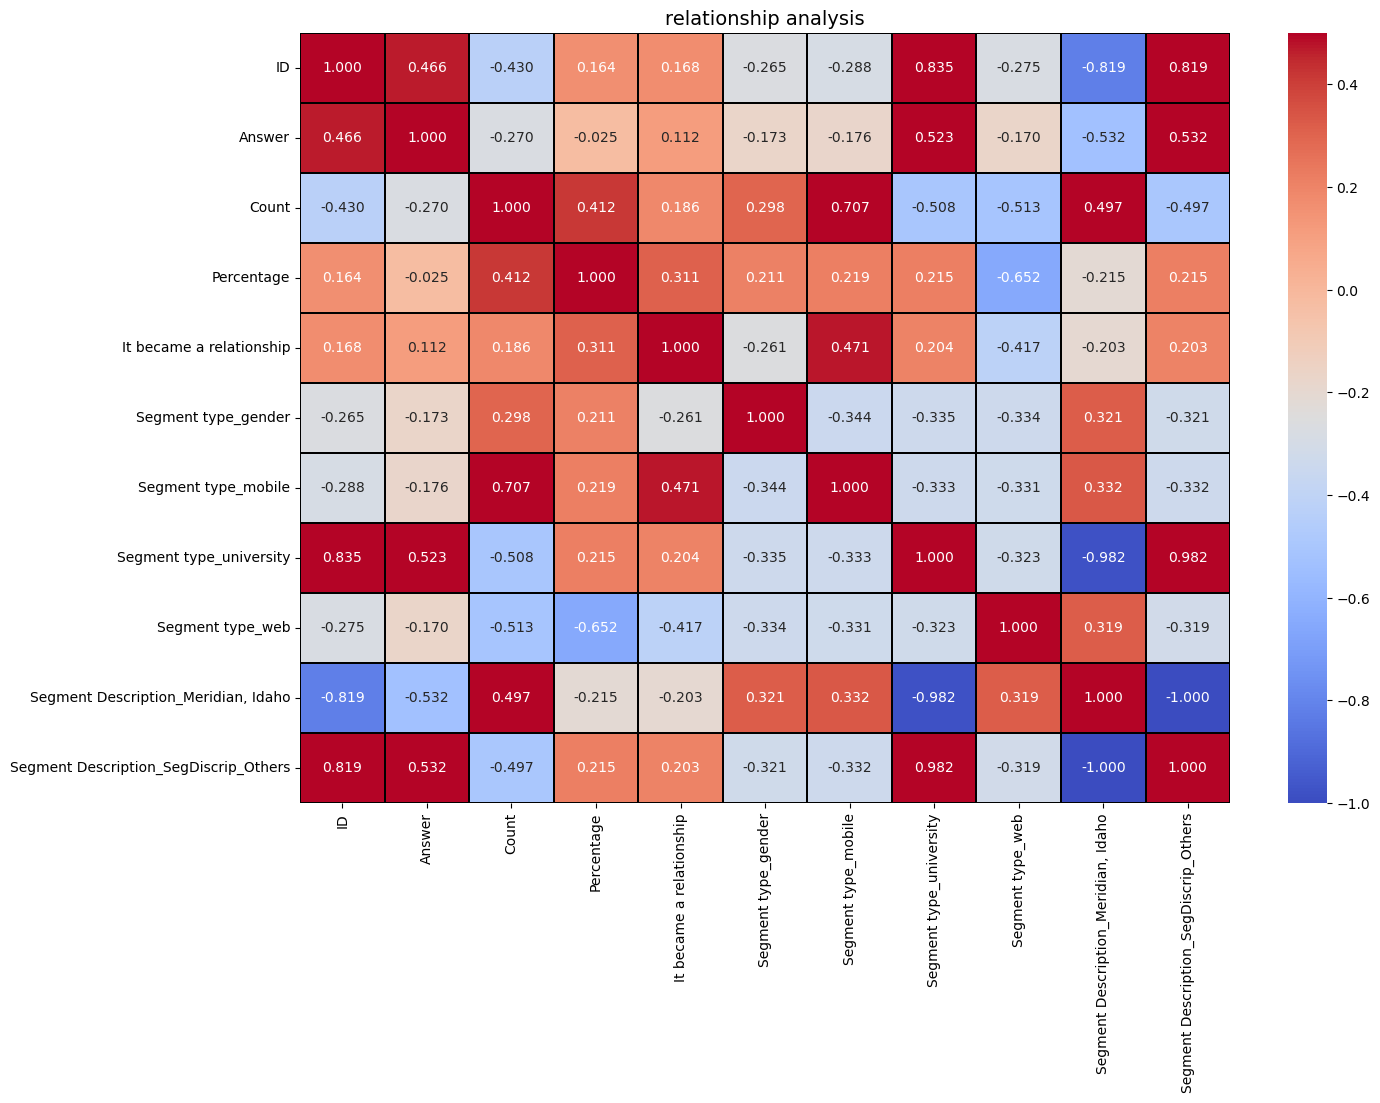

In [39]:
plt.figure(figsize=(15,10)) 
plt.title('relationship analysis', fontsize=14)
sns.heatmap(df_train.corr(), cmap='coolwarm', linewidths=0.2, vmax=0.5, linecolor='black', fmt = '.3f', annot=True)
plt.show()

<span style="color: blue; font-size: 18pt">
4. 가공한 데이터 .csv 파일로 저장하기  
</span>

In [40]:
df_train.to_csv('5_Refined Dataset_(1).csv', index=False)

In [41]:
pwd('5_Refined Dataset_(1).csv')

'C:\\Users\\user\\Downloads\\final'

<span style="color: blue; font-size: 18pt">
5. test 데이터셋에도 동일한 과정 반복해 .csv 파일로 저장하기  
</span>

test 데이터셋인 2_Original Dataset(2).csv에도 동일한 데이터 가공을 반복해 딥러닝을 위한 데이터셋으로 만들겠습니다.

먼저 df_train과 df_test가 비슷한 경향성의 데이터를 가지고 있는지 데이터 분석 및 시각화를 통해 확인해보겠습니다.

In [42]:
df_test

,ID,Segment type,Segment Description,Answer,Count,Percentage
0,292974.2311,university,"University of California, Davis",Yes,0.230742,0.115371
1,292889.7996,web,"Meridian, Idaho",No,0.000000,0.000000
2,293724.0350,university,"Westport, CT",Yes,0.000000,0.000000
3,292884.0724,mobile,"Meridian, Idaho",No,1497.699982,0.388752
4,292882.0964,mobile,"Meridian, Idaho",No,1439.464988,0.373646
...,...,...,...,...,...,...
627,293085.4757,university,University of Miami,Yes,1.000000,0.743904
628,292890.5771,web,"Meridian, Idaho",No,0.000000,0.000000
629,292891.5922,gender,"Meridian, Idaho",No,1104.827490,0.411368
630,292889.9699,web,"Meridian, Idaho",No,0.000000,0.000000


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   632 non-null    float64
 1   Segment type         632 non-null    object 
 2   Segment Description  632 non-null    object 
 3   Answer               632 non-null    object 
 4   Count                632 non-null    float64
 5   Percentage           632 non-null    float64
dtypes: float64(3), object(3)
memory usage: 29.8+ KB


In [44]:
# 범주형 열 목록
category = ['Segment type', 'Segment Description', 'Answer']

# 각 열에 대해 unique value 개수와 목록을 출력
for col in category:
    unique_values = df_test[col].unique() 
    unique_count = len(unique_values) 
    print(f'Unique values in "{col}" column count: {unique_count}')
    print(unique_values)
    print('-'*50)

Unique values in "Segment type" column count: 4
['university' 'web' 'mobile' 'gender']
--------------------------------------------------
Unique values in "Segment Description" column count: 101
['University of California, Davis' 'Meridian, Idaho' 'Westport, CT'
 'San Diego State University' 'UMass Amherst' 'Iowa State University'
 'Minnesota State University Mankato' 'University of Rochester'
 'University of Mississippi' 'Columbia University' 'Lehigh University'
 'Mississippi State University' 'Indiana University'
 'St. Lawrence University' 'University of Notre Dame' 'Duke University'
 'North Carolina State' 'University of Central Oklahoma'
 'Castleton State College' 'Michigan Technological University'
 'University of Pennsylvania' 'Miami University (Ohio)'
 'Brigham Young University' 'University of Wisconsin-La Crosse'
 'Texas Tech University' 'Boston College' 'Tulane University'
 'University of Oregon' 'Mobile respondents'
 'University of Wisconsin-Whitewater' 'University of Kentuck

In [45]:
# 'Segement type' 열의 unique value
df_test.groupby('Segment type').size()

Segment type
gender        144
mobile        149
university    168
web           171
dtype: int64

In [48]:
# 'Segement Description' 열의 unique value 오름차순 정렬
df_test.groupby('Segment Description').size().sort_values(ascending=True)

Segment Description
Appalachian State University            1
Middlebury College                      1
Northern Arizona University             1
Northwestern University                 1
Ohio State University                   1
                                     ... 
University of Mississippi               4
University of California, Berkeley      4
University of Rochester                 4
University of Notre Dame                5
Meridian, Idaho                       464
Length: 101, dtype: int64

In [49]:
# 'Meridian, Idaho'을 제외하고 나머지 고유값들을 리스트로 저장
list = df_test[df_test['Segment Description'] != 'Meridian, Idaho']['Segment Description'].unique()

In [50]:
print(list)

['University of California, Davis' 'Westport, CT'
 'San Diego State University' 'UMass Amherst' 'Iowa State University'
 'Minnesota State University Mankato' 'University of Rochester'
 'University of Mississippi' 'Columbia University' 'Lehigh University'
 'Mississippi State University' 'Indiana University'
 'St. Lawrence University' 'University of Notre Dame' 'Duke University'
 'North Carolina State' 'University of Central Oklahoma'
 'Castleton State College' 'Michigan Technological University'
 'University of Pennsylvania' 'Miami University (Ohio)'
 'Brigham Young University' 'University of Wisconsin-La Crosse'
 'Texas Tech University' 'Boston College' 'Tulane University'
 'University of Oregon' 'Mobile respondents'
 'University of Wisconsin-Whitewater' 'University of Kentucky'
 'Southern Methodist University' 'Northwestern University'
 'Michigan State University' 'University of Texas'
 'Whatsgoodly University' 'Yale University' 'University of Michigan'
 'Baylor University' 'Universit

In [51]:
# Merdian, Idaho를 제외한 value를 리스트로 만들어 코드를 간소화
# df_train에 바로 변경사항 저장
df_test['Segment Description'].replace(list, 'SegDiscrip_Others', inplace=True)

<AxesSubplot:xlabel='Segment Description'>

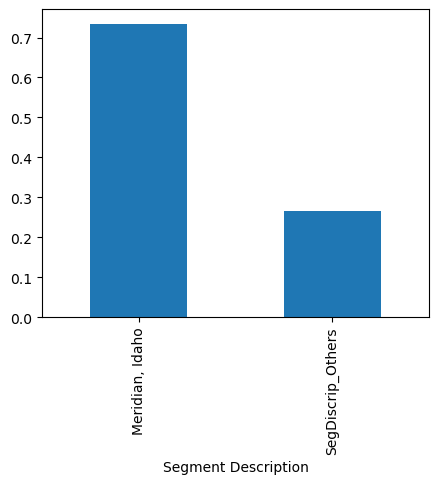

In [52]:
# bar plot으로 시각화 
df_test['Segment Description'].value_counts(normalize = True).plot.bar(figsize = (5, 4))

In [53]:
# 값의 종류가 2가지로 줄어듦
# 변경사항 df_test에 저장
df_test['Answer'].replace("I don't use Tinder", "No", inplace = True)

<AxesSubplot:xlabel='Answer'>

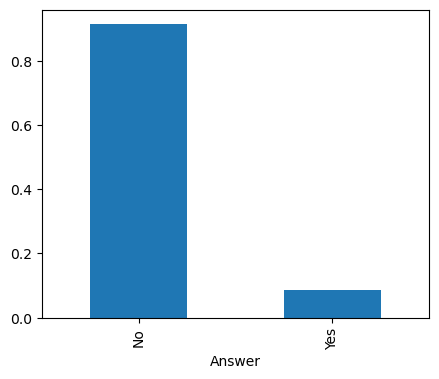

In [54]:
# bar plot으로 시각화 
df_test['Answer'].value_counts(normalize = True).plot.bar(figsize = (5, 4))

In [55]:
df_test['Answer'].replace('Yes', 1, inplace=True)
df_test['Answer'].replace('No', 0, inplace=True)
df_test['Answer'] = df_test['Answer'].astype(int)

<AxesSubplot:xlabel='Answer'>

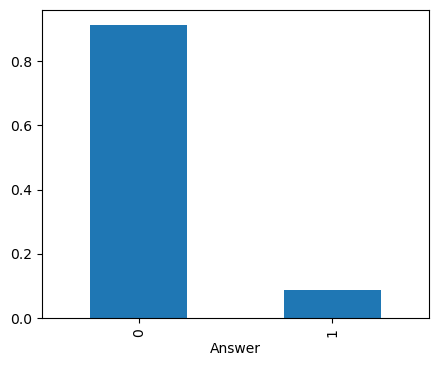

In [56]:
# bar plot으로 시각화 
df_test['Answer'].value_counts(normalize = True).plot.bar(figsize = (5, 4))

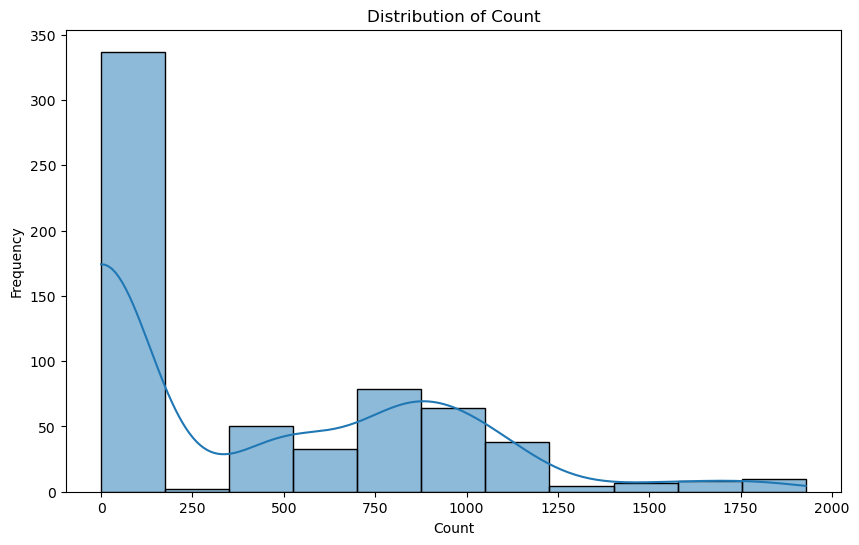

In [57]:
# Count 컬럼의 분포 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df_test['Count'], kde=True)
plt.title('Distribution of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [58]:
# 원 핫 인코딩
selected_obj_test = df_test.select_dtypes('object')
selected_obj_test

,Segment type,Segment Description
0,university,SegDiscrip_Others
1,web,"Meridian, Idaho"
2,university,SegDiscrip_Others
3,mobile,"Meridian, Idaho"
4,mobile,"Meridian, Idaho"
...,...,...
627,university,SegDiscrip_Others
628,web,"Meridian, Idaho"
629,gender,"Meridian, Idaho"
630,web,"Meridian, Idaho"


In [59]:
# 원 핫 엔코딩 수행
encoder= OneHotEncoder(handle_unknown = 'ignore') # 에러 처리 포함 
encoded_test = encoder.fit_transform(selected_obj_test).toarray()
test = pd.DataFrame(encoded_test, columns=encoder.get_feature_names(selected_obj_test.columns))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
test

,Segment type_gender,Segment type_mobile,Segment type_university,Segment type_web,"Segment Description_Meridian, Idaho",Segment Description_SegDiscrip_Others
0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
627,0.0,0.0,1.0,0.0,0.0,1.0
628,0.0,0.0,0.0,1.0,1.0,0.0
629,1.0,0.0,0.0,0.0,1.0,0.0
630,0.0,0.0,0.0,1.0,1.0,0.0


In [61]:
# 기존의 object 데이터 컬럼을 원핫 엔코딩한 컬럼으로 교체
df_test = df_test.drop(selected_obj_test.columns, axis=1)
df_test = pd.concat([df_test, test], axis=1)
df_test

,ID,Answer,Count,Percentage,Segment type_gender,Segment type_mobile,Segment type_university,Segment type_web,"Segment Description_Meridian, Idaho",Segment Description_SegDiscrip_Others
0,292974.2311,1,0.230742,0.115371,0.0,0.0,1.0,0.0,0.0,1.0
1,292889.7996,0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0
2,293724.0350,1,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0
3,292884.0724,0,1497.699982,0.388752,0.0,1.0,0.0,0.0,1.0,0.0
4,292882.0964,0,1439.464988,0.373646,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
627,293085.4757,1,1.000000,0.743904,0.0,0.0,1.0,0.0,0.0,1.0
628,292890.5771,0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0
629,292891.5922,0,1104.827490,0.411368,1.0,0.0,0.0,0.0,1.0,0.0
630,292889.9699,0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0


In [62]:
# csv로 저장
df_test.to_csv('5_Refined Dataset_(2).csv', index=False)

test 데이터셋의 데이터 분포도 train 데이터셋과 비슷한 경향을 띄는 것을 확인할 수 있었습니다. 따라서 동일한 데이터 전처리 과정을 수행해 딥러닝 예측에 사용될 데이터셋을 구축 완료할 수 있습니다.